In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df = df.drop(columns = "id")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [6]:
df.describe() 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


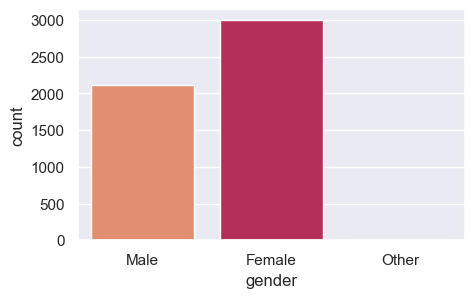

In [58]:
print(df.gender.value_counts())
plt.figure(figsize=(5,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='gender', palette='rocket_r')

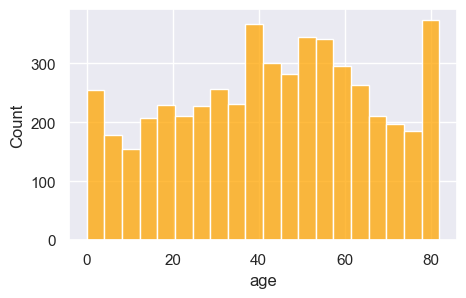

In [82]:
plt.figure(figsize=(5,3));
sns.set_theme(style='darkgrid');
ax = sns.histplot(data=df, x='age', color='orange', fill=True);

0    4612
1     498
Name: hypertension, dtype: int64


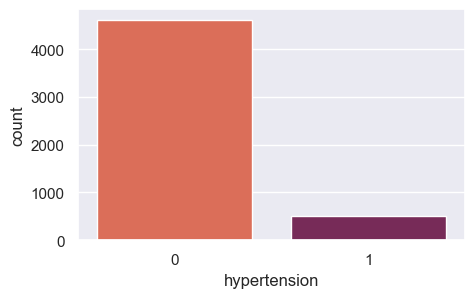

In [80]:
print(df.hypertension.value_counts())
plt.figure(figsize=(5,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='hypertension', palette='rocket_r')

0    4834
1     276
Name: heart_disease, dtype: int64


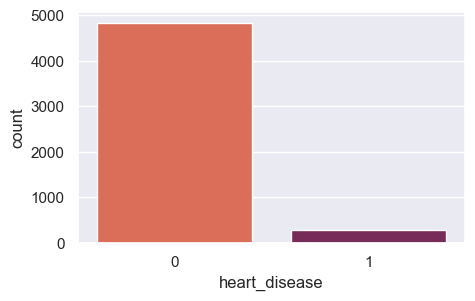

In [83]:
print(df.heart_disease.value_counts())
plt.figure(figsize=(5,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='heart_disease', palette='rocket_r')

Yes    3353
No     1757
Name: ever_married, dtype: int64


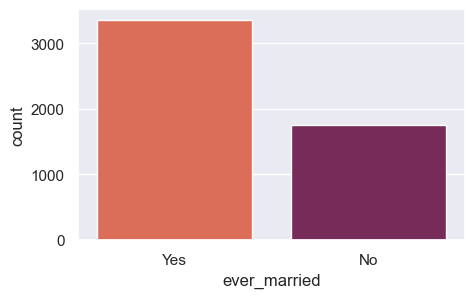

In [84]:
print(df.ever_married.value_counts())
plt.figure(figsize=(5,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='ever_married', palette='rocket_r')

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


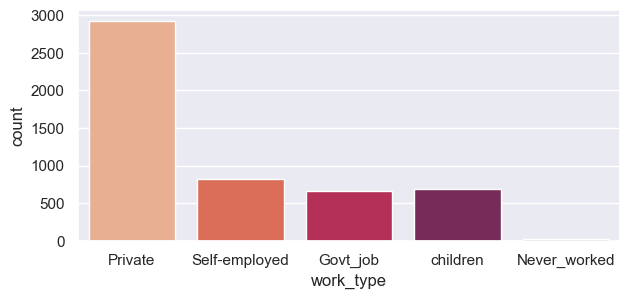

In [86]:
print(df.work_type.value_counts())
plt.figure(figsize=(7,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='work_type', palette='rocket_r')

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


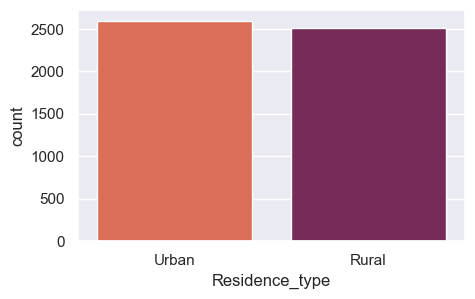

In [87]:
print(df.Residence_type.value_counts())
plt.figure(figsize=(5,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='Residence_type', palette='rocket_r')

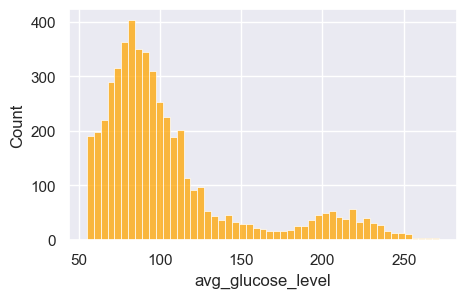

In [88]:
plt.figure(figsize=(5,3));
sns.set_theme(style='darkgrid');
ax = sns.histplot(data=df, x='avg_glucose_level', color='orange', fill=True);

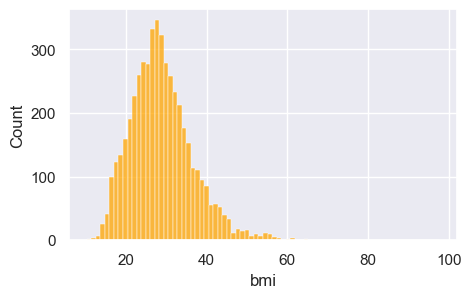

In [89]:
plt.figure(figsize=(5,3));
sns.set_theme(style='darkgrid');
ax = sns.histplot(data=df, x='bmi', color='orange', fill=True);

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


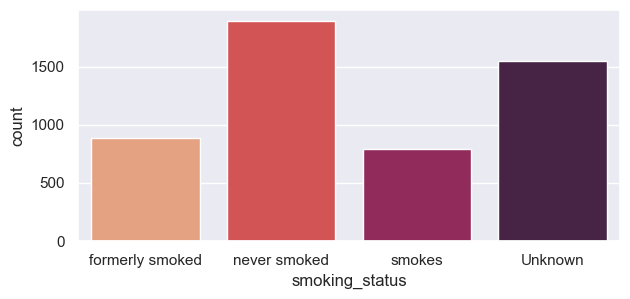

In [91]:
print(df.smoking_status.value_counts())
plt.figure(figsize=(7,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='smoking_status', palette='rocket_r')

0    4861
1     249
Name: stroke, dtype: int64


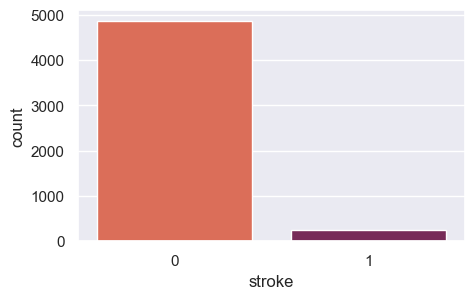

In [92]:
print(df.stroke.value_counts())
plt.figure(figsize=(5,3))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df, x='stroke', palette='rocket_r')

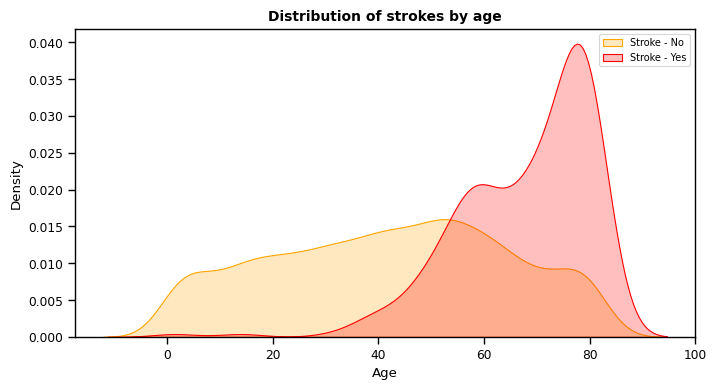

In [39]:
sns.set_context("paper",font_scale=1)
_, ax = plt.subplots(figsize=(8,4))
ax = sns.kdeplot(df.age[(df["stroke"] == 0) ], color='orange', fill=True);
ax = sns.kdeplot(df.age[(df["stroke"] == 1) ], color='red', fill=True);
ax.legend(["Stroke - No","Stroke - Yes"],loc='upper right',fontsize=7);
ax.set_ylabel('Density');
ax.set_xlabel('Age');
ax.set_title('Distribution of strokes by age',fontdict={'fontsize':10,'fontweight':'bold'});

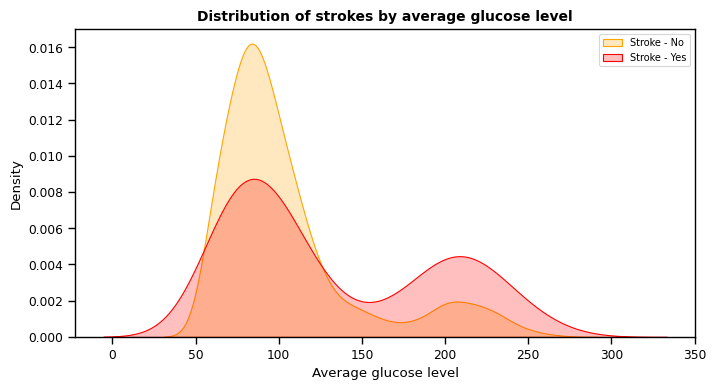

In [40]:
sns.set_context("paper",font_scale=1)
_, ax = plt.subplots(figsize=(8,4))
ax = sns.kdeplot(df.avg_glucose_level[(df["stroke"] == 0) ], color='orange', fill=True);
ax = sns.kdeplot(df.avg_glucose_level[(df["stroke"] == 1) ], color='red', fill=True);
ax.legend(["Stroke - No","Stroke - Yes"],loc='upper right',fontsize=7);
ax.set_ylabel('Density');
ax.set_xlabel('Average glucose level');
ax.set_title('Distribution of strokes by average glucose level',fontdict={'fontsize':10,'fontweight':'bold'});

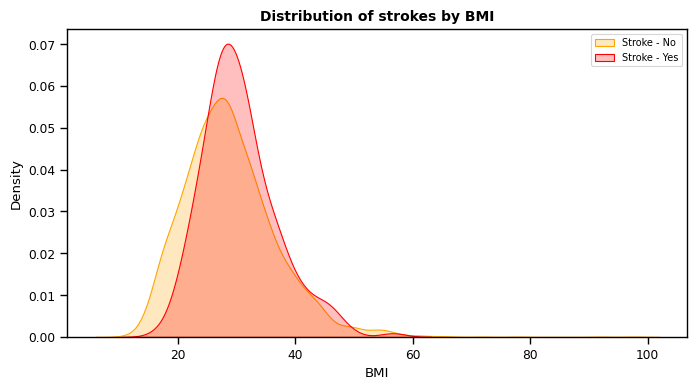

In [41]:
sns.set_context("paper",font_scale=1)
_, ax = plt.subplots(figsize=(8,4))
ax = sns.kdeplot(df.bmi[(df["stroke"] == 0) ], color='orange', fill=True);
ax = sns.kdeplot(df.bmi[(df["stroke"] == 1) ], color='red', fill=True);
ax.legend(["Stroke - No","Stroke - Yes"],loc='upper right',fontsize=7);
ax.set_ylabel('Density');
ax.set_xlabel('BMI');
ax.set_title('Distribution of strokes by BMI',fontdict={'fontsize':10,'fontweight':'bold'});

In [94]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [95]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


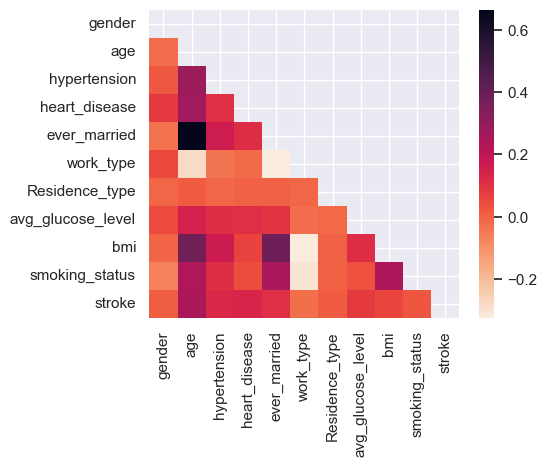

In [96]:
plt.figure(figsize=(5,4))
cor = df.corr(method="spearman")
mask = np.triu(np.ones_like(cor, dtype=bool)) 
sns.heatmap(cor, mask=mask, cmap=sns.color_palette("rocket_r", as_cmap=True))
plt.show();

In [97]:
df.corr(method="spearman")['stroke'][:].sort_values(ascending=False)

stroke               1.000000
age                  0.249531
heart_disease        0.134914
hypertension         0.127904
ever_married         0.108340
avg_glucose_level    0.082541
bmi                  0.055445
smoking_status       0.026407
Residence_type       0.015458
gender               0.008987
work_type           -0.024647
Name: stroke, dtype: float64